In [1]:
from ff_environment import TargetReach
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = TargetReach(space_padding=2, discover=True)
env_info = env.reset()

In [3]:
# size of each action
action_size = env.action_size
print('Size of each action:', action_size)

# examine the state space 
state = env_info.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:', state)

Size of each action: 2
The agent observes a state with length: 6
The starting state looks like: [0.5 1.  0.  0.  0.  0. ]


In [4]:
# Instantiate the agent:
agent = Agent(state_size, action_size, random_seed=2)

In [5]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 600, print_every=250, stop=True)

Episode 0 	Average Reward: -10.00
Episode 250 	Average Reward: -10.00
Episode 500 	Average Reward: -10.00
Episode 599 	Average Reward: -10.00

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

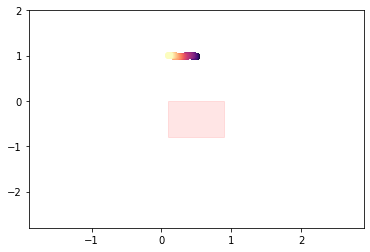

In [6]:
trajectories.plot(3, legend=False)

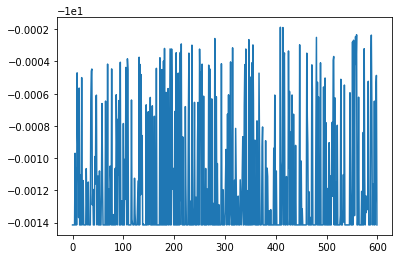

In [7]:
plt.plot(scores)

In [8]:
env.add_forcefield(force=(6,0))

In [9]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 600, print_every=250, stop=False)

Episode 0 	Average Reward: -10.00
Episode 250 	Average Reward: -10.00
Episode 500 	Average Reward: -10.00
Episode 599 	Average Reward: -10.00

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

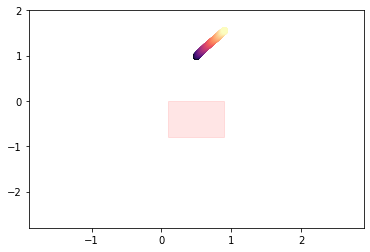

In [10]:
trajectories.plot(598, legend=False)

In [11]:
env.add_forcefield(force=(0,0))

In [12]:
# train the agent with ddpg
scores, trajectories, actions_tracker = agent.train_ddpg(env, n_episodes = 600, print_every=250, stop=False)

Episode 0 	Average Reward: -10.00
Episode 250 	Average Reward: -10.00
Episode 500 	Average Reward: -10.00
Episode 599 	Average Reward: -10.00

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

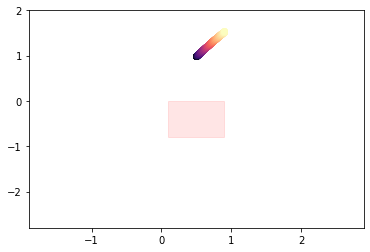

In [13]:
trajectories.plot(0, legend=False)